# Importance sampling

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from vmc.interface import PyHarmonicOscillator, PyMetropolisAlgorithm, \
    PySimpleGaussian, PySampler, PyImportanceMetropolis
from vmc import run_experiment

from IPython.core.pylabtools import figsize
from IPython.core.display import display

In [2]:
sns.set(color_codes=True)

In [3]:
mass = 1.0
omega = 1.0
diffusion_coefficient = 0.5

step_length = 1.0
time_step = 0.5

In [4]:
alpha_min = 0.1
alpha_max = 0.9
num_alphas = 17

parameter_names = ["alpha"]

alphas = np.linspace(alpha_min, alpha_max, num_alphas).reshape(num_alphas, 1)

In [5]:
num_particles = 500
num_dimensions = 3
num_samples = int(1e6)

num_thermalization_steps = 0

kwargs = {
    "num_samples": num_samples, "step_length": step_length,
    "num_thermalization_steps": num_thermalization_steps
}

In [6]:
wavefunction_importance = PySimpleGaussian(
    num_particles, num_dimensions, mass, omega, spread=step_length)
sampler_importance = PySampler(
    wavefunction_importance, PyHarmonicOscillator(),
    PyImportanceMetropolis(time_step, diffusion_coefficient))

In [7]:
df_importance = run_experiment(
    sampler_importance, wavefunction_importance, alphas,
    parameter_names, **kwargs)

100%|██████████| 17/17 [02:21<00:00,  8.32s/it]


In [8]:
wavefunction = PySimpleGaussian(
    num_particles, num_dimensions, mass, omega, spread=step_length)
sampler = PySampler(
    wavefunction, PyHarmonicOscillator(),
    PyMetropolisAlgorithm())

In [9]:
df = run_experiment(
    sampler, wavefunction, alphas,
    parameter_names, **kwargs)

100%|██████████| 17/17 [01:58<00:00,  6.97s/it]


In [10]:
display(df_importance)

,alpha,energy,variance,acceptance
0,0.10,1886.856807,4100.758893,0.973837
1,0.15,1324.154611,1106.017665,0.960147
2,0.20,1061.235732,457.340795,0.944565
3,0.25,918.626999,200.356200,0.927338
4,0.30,836.747887,89.196417,0.909218
5,0.35,789.050078,40.912057,0.889112
6,0.40,763.114789,14.288289,0.868779
7,0.45,751.592550,2.891347,0.846268
8,0.50,750.000000,0.000000,0.823496
9,0.55,755.710276,2.140968,0.798318


In [11]:
display(df)

,alpha,energy,variance,acceptance
0,0.10,1879.461081,7463.962753,0.759031
1,0.15,1320.049690,2208.393319,0.708156
2,0.20,1060.258167,743.311034,0.664844
3,0.25,917.627517,343.845379,0.630146
4,0.30,836.071485,131.376347,0.598193
5,0.35,789.010228,58.510427,0.568994
6,0.40,763.086403,17.616039,0.543111
7,0.45,751.405591,3.970490,0.519842
8,0.50,750.000000,0.000000,0.497451
9,0.55,755.693274,2.301003,0.479367


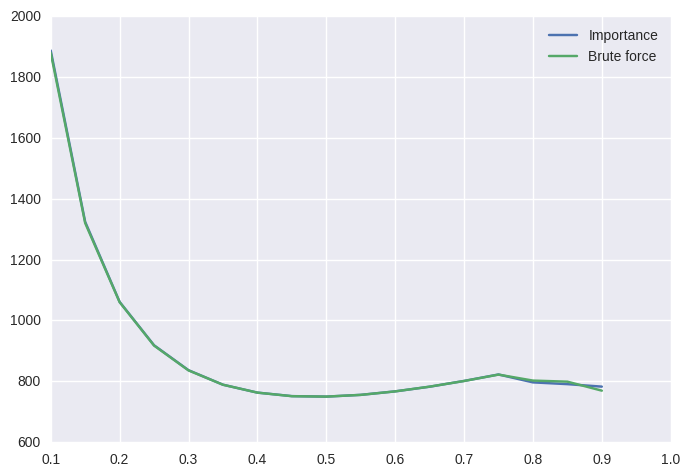

In [12]:
plt.plot(
    df_importance["alpha"], df_importance["energy"],
    label="Importance"
)
plt.plot(
    df["alpha"], df["energy"],
    label="Brute force"
)
plt.legend(loc="best")
plt.show()